# Credal Sets Visualization Plotting

This notebook demonstrates how to visualize **Credal Sets** to analyze model uncertainty.

A **Credal Set** is a set of probability distributions. Instead of predicting a single probability vector (e.g., `[0.7, 0.3]`), a model might predict a region of plausible probabilities (e.g., Class A is between 0.6 and 0.8). This is crucial for capturing **epistemic uncertainty** (lack of knowledge).

We will use the `create_credal_plot` function to visualize these sets in three scenarios:
1.  **Binary Classification** (Interval Plots)
2.  **3-Class Classification** (Ternary/Simplex Plots)
3.  **Multi-Class Classification** (Spider/Radar Plots)

## 1. Import Libraries

We import the necessary modules. We rely on the `credal_visualization` module which handles the dispatching logic.

In [1]:
import numpy as np

# Importing the visualization tool
# Note: Ensure the 'probly' package is installed or the file structure is correct.
try:
    from probly.visualization.credalviz.credal_visualization import create_credal_plot
except ImportError:
    # Fallback if running locally with flat files (may require adjusting internal imports in the files)
    # For this tutorial, we assume the package structure is valid.
    from credal_visualization import create_credal_plot

# Optional: Set random seed
np.random.seed(42)

## 2. Binary Classification (2 Classes)

**Visualization: Interval Plot**

In binary classification, a Credal Set defines a range of probabilities for the positive class (e.g., $P(\text{Class 1}) \in [0.2, 0.5]$). The interval plot visualizes this range.

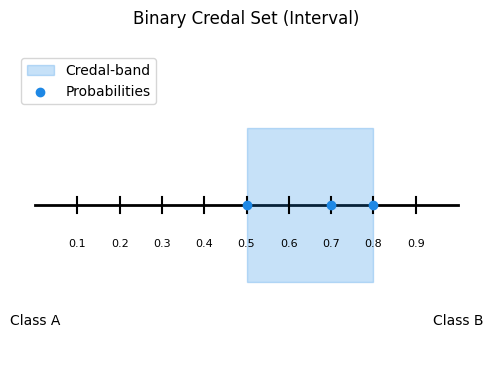

<Axes: title={'center': 'Binary Credal Set (Interval)'}>

In [ ]:
# --- 1. Generate Data ---
# We simulate a Credal Set defined by 3 vertex distributions for a binary problem.
# Each row is a valid probability vector [P(C0), P(C1)]
points_2d = np.array(
    [
        [0.2, 0.8],  # Vertex 1
        [0.5, 0.5],  # Vertex 2
        [0.3, 0.7],  # Vertex 3
    ]
)

# Define labels
labels_2d = ["Class A", "Class B"]

# --- 2. Plot ---
# The function automatically detects 2 classes and draws an Interval Plot.
create_credal_plot(
    input_data=points_2d,
    labels=labels_2d,
    title="Binary Credal Set (Interval)",
    choice="Credal",  # Show the Credal Set range
)

### Interpretation
* **Blue Bar:** Represents the range of uncertainty. The true probability is believed to lie somewhere within this bar.
* **Red Dot (if enabled):** Represents the MLE (Mean/Average) prediction.

## 3. Ternary Classification (3 Classes)

**Visualization: Ternary (Simplex) Plot**

For 3 classes, the probabilities sum to 1, forming a 2D triangle (Simplex). A Credal Set is a polygon (convex hull) inside this triangle.

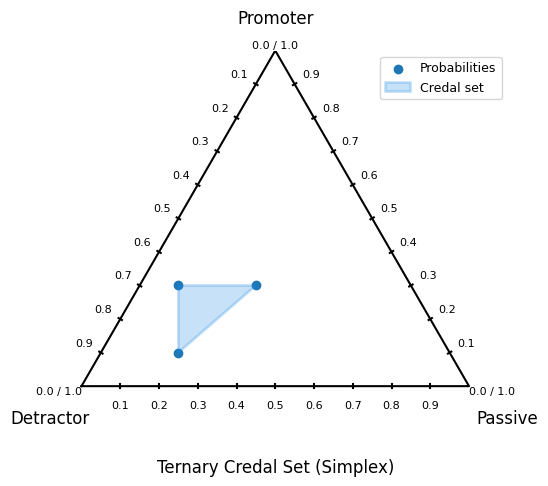

<Axes: title={'center': 'Ternary Credal Set (Simplex)'}>

In [ ]:
# --- 1. Generate Data ---
# Simulate a Credal Set for 3 classes (e.g., Detractor, Passive, Promoter)
# These points define the corners of the uncertainty region.
points_3d = np.array(
    [
        [0.7, 0.2, 0.1],  # Mostly Class 1
        [0.4, 0.3, 0.3],  # Uncertain
        [0.6, 0.1, 0.3],  # Mix of 1 and 3
    ]
)

labels_3d = ["Detractor", "Passive", "Promoter"]

# --- 2. Plot ---
# Automatically detects 3 classes and draws a Ternary Plot.
create_credal_plot(
    input_data=points_3d,
    labels=labels_3d,
    title="Ternary Credal Set (Simplex)",
    choice="Credal",  # Highlights the convex hull (green area)
)

### Interpretation
* **Green Area:** The convex hull representing the Credal Set. A larger area implies higher epistemic uncertainty.
* **Corners:** Represent certainty (100% probability for one class).

## 4. Multi-Class Classification (4+ Classes)

**Visualization: Spider (Radar) Plot**

For high-dimensional data (e.g., CIFAR-10 with 10 classes), we cannot use a simplex. Instead, we use a Spider Plot to show the **Min/Max probability bounds** for each class.

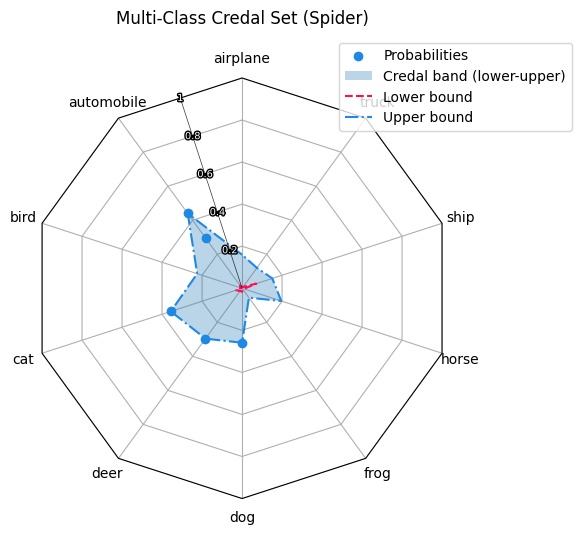

<RadarAxes: title={'center': 'Multi-Class Credal Set (Spider)'}>

In [ ]:
# --- 1. Generate Data ---
# Simulate a scenario with 10 classes (e.g., CIFAR-10)
# We generate 5 "sample" probability vectors that form the Credal Set.
n_classes = 10
n_samples = 5
points_multi = np.random.dirichlet(alpha=np.ones(n_classes), size=n_samples)

# Custom labels
labels_multi = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# --- 2. Plot ---
# Automatically detects >3 classes and draws a Spider Plot.
create_credal_plot(
    input_data=points_multi,
    labels=labels_multi,
    title="Multi-Class Credal Set (Spider)",
    choice="Credal",  # Shows the min-max bands
)

### Interpretation
* **Red Line (Lower Bound):** The minimum probability assigned to each class across the set.
* **Blue Line (Upper Bound):** The maximum probability assigned to each class.
* **Shaded Band:** The uncertainty gap. A wide band for a specific class means the model is unsure about that specific class.

## 5. Conclusion

The `create_credal_plot` function provides a unified interface to visualize uncertainty across different dimensions:

* **Intervals** for precise binary bounds.
* **Simplexes** for geometric interpretation of 3-class problems.
* **Spider Plots** for scaling to many classes.

By inspecting these plots, we can distinguish between **aleatoric uncertainty** (data noise, often irreducible) and **epistemic uncertainty** (model ignorance, represented by the size of the set/area).